In [1]:
import heapq
import operator 
import numpy as np
from mnist import MNIST

In [2]:
mndata = MNIST('Data')
train_images_data, train_labels_data = mndata.load_training()
test_images_data, test_labels_data = mndata.load_testing()
print('Data imported!')

Data imported!


In [3]:
train_images=np.asarray(train_images_data)
test_images=np.asarray(test_images_data)
train_labels=np.asarray(train_labels_data)
test_labels=np.asarray(test_labels_data)

In [24]:
def knn(train_images, train_labels, test_images,k=1 ):
    K=[1,3,5,10,20,30,40,50,60]
    predictions={}
    for k in K:
      predictions[k]=[]
    for i in range(100):
        if i%100==0 or i==10000:     
            print('Predictions completed: ', i)
        diff=test_images[i]-train_images
        s=np.sqrt(np.sum(np.square(diff), axis=1))
        s=s.reshape((60000,1))
        train_labels_reshaped=train_labels.reshape((60000,1))
        final=np.hstack((s,train_labels_reshaped))
        final = final[final[:,0].argsort()]
        for k in K:
          final_labels=final[:,1][:k]
          unique, counts = np.unique(final_labels, return_counts=True)
          x=dict(zip(unique, counts))
          predictions[k].append(int(max(x.items(), key=operator.itemgetter(1))[0]))
    return predictions

In [25]:
predictions=knn(train_images, train_labels, test_images,1)

Predictions completed:  0


In [26]:
K=[1,3,5,10,20,30,40,50,60]
acc=[]
for k in K:
    prediction=predictions[k]
    prediction=np.asarray(prediction)
    diff=prediction-test_labels[:100]
    unique, counts = np.unique(diff, return_counts=True)
    diff_dict=dict(zip(unique, counts))
    accuracy=(diff_dict[0]/100)*100
    acc.append(accuracy)
    print(k, accuracy)

1 100.0
3 99.0
5 99.0
10 96.0
20 97.0
30 97.0
40 98.0
50 96.0
60 97.0


C:\Users\hasee\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

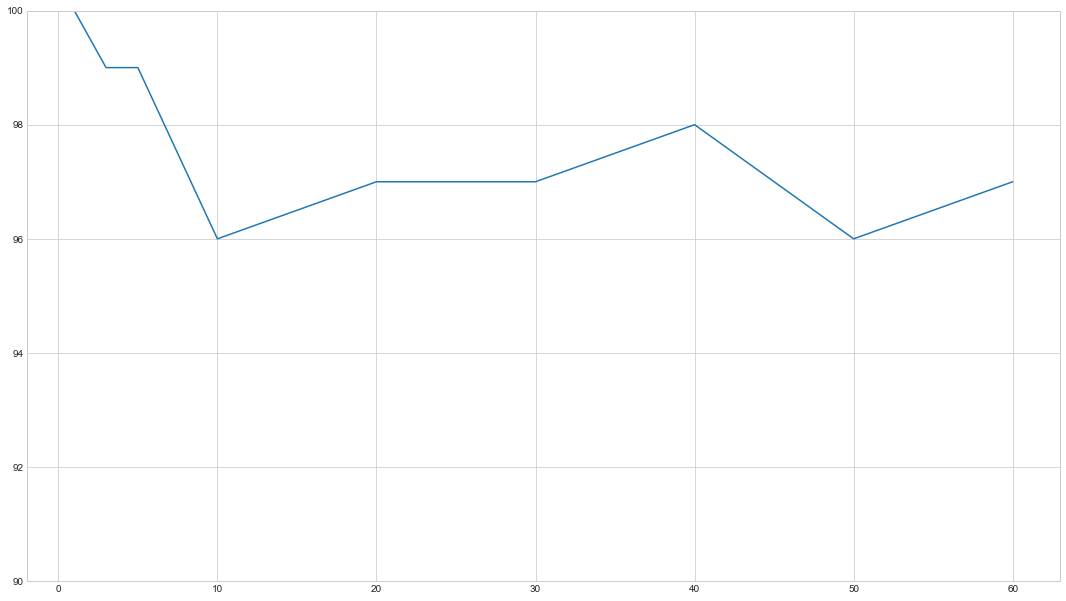

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = matplotlib.pyplot.gcf()

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
axes=plt.gca()
axes.set_ylim([90,100])
ax = plt.axes()
ax.plot(K,acc)